# Figure 1 C 

This Notebook will recapitulate the findings from Figure 1 C of the paper STATE-DEPENDENT RESPONSES TO INTRACRANIAL BRAIN STIMULATION IN DEPRESSION: A CASE REPORT. In order to run this notebook please ensure you have installed the relevant packages, from *requirements.txt*. Data will be included in the github repo. Please direct inquiries to katherine.scangos@ucsf.edu or ghassan.makhoul@ucsf.edu

### Setup 

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from seaborn import plotting_context
import re
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [14]:
#Set up Likert Dataframe
stim_resp_df = pd.read_csv('clin_stim_resp_full.csv', header =0)

#Remove TMS - like sessions 
stim_resp_df= stim_resp_df[~stim_resp_df.full_params.apply(lambda x: 'TMS' in x)]
stim_resp_df



,stim_site,full_params,arousal,pos_neg,somatic,stim_sesh,trial,freq,amps,duration
0,ROFC 5+/6-,100Hz 3mA 1s,0,0,0,Stim safety survey,1,100Hz,3mA,1s
1,ROFC 5+/6-,100Hz 3mA 3s,0,0,0,Stim safety survey,2,100Hz,3mA,3s
2,ROFC 5+/6-,100Hz 6mA 1s,0,0,0,Stim safety survey,3,100Hz,6mA,1s
3,ROFC 5+/6-,100Hz 6mA 3s,0,0,0,Stim safety survey,4,100Hz,6mA,3s
4,ROFC 3+/4-,100Hz 3mA 1s,0,0,-1,Stim safety survey,5,100Hz,3mA,1s
5,ROFC 3+/4-,100Hz 3mA 3s,1,0,0,Stim safety survey,6,100Hz,3mA,3s
6,ROFC 3+/4-,100Hz 6mA 1s,0,0,-1,Stim safety survey,7,100Hz,6mA,1s
7,ROFC 3+/4-,100Hz 6mA 3s,1,0,0,Stim safety survey,8,100Hz,6mA,3s
8,RH 3+/4-,100Hz 3mA 1s,0,0,0,Stim safety survey,9,100Hz,3mA,1s
9,RH 3+/4-,100Hz 3mA 3s,0,0,-1,Stim safety survey,10,100Hz,3mA,3s


In [15]:
# Separate high and low ROFC stim
rofc_full_df = stim_resp_df[stim_resp_df.stim_site == 'ROFC 7+/1-']
non_1_trials = rofc_full_df[rofc_full_df.freq !='1Hz'].trial.values
inds = rofc_full_df[rofc_full_df.freq =='1Hz'].index

stim_resp_df.loc[inds,'stim_site']  = 'ROFC 7+/1- 1Hz'

# correct for ROFC 
hf_inds = [] #trackign high frequency ROFC stim session indices
for i, row in stim_resp_df[['stim_site','full_params']].iterrows():
    site, full = row
    if site == 'ROFC 7+/1-' and '100Hz' in full:
        hf_inds.append(i)
        
## set stim site name for groupby later
stim_resp_df.iloc[hf_inds, 0] = 'ROFC 7+/1- 100Hz'

In [16]:
# Sum Responses Across Stim Site
summed_resp_df = stim_resp_df.groupby('stim_site').apply(lambda x: x[[ 'arousal', 'pos_neg', 'somatic']].sum(axis=0))
summed_resp_df.sort_values('pos_neg', ascending=False)

,arousal,pos_neg,somatic
stim_site,,,
RVC 2+/3-,14,10,-2
ROFC 7+/1- 1Hz,-3,7,-2
LVC 1+/2-,0,3,-2
LSGC 1+/2-,0,2,0
ROFC 7+/1-,-2,1,0
LVC 2+/3-,4,1,-2
ROFC 6+/5-,2,1,-3
ROFC 5+/6-,0,0,0
LOFC 1+/3-,0,0,0


In [17]:
inds = summed_resp_df.sort_values('pos_neg', ascending=False).index
counts = stim_resp_df.groupby('stim_site').count()
counts.loc[inds]

,full_params,arousal,pos_neg,somatic,stim_sesh,trial,freq,amps,duration
stim_site,,,,,,,,,
RVC 2+/3-,12,12,12,12,12,12,12,12,12
ROFC 7+/1- 1Hz,11,11,11,11,11,11,11,11,11
LVC 1+/2-,7,7,7,7,7,7,7,7,7
LSGC 1+/2-,7,7,7,7,7,7,7,7,7
ROFC 7+/1-,2,2,2,2,2,2,2,2,2
LVC 2+/3-,5,5,5,5,5,5,5,5,5
ROFC 6+/5-,9,9,9,9,9,9,9,9,9
ROFC 5+/6-,4,4,4,4,4,4,4,4,4
LOFC 1+/3-,1,1,1,1,1,1,1,1,1


In [18]:
#Get rid of TMS-like sessions
avg_resp_df = stim_resp_df.groupby('stim_site').apply(lambda x: x[[ 'arousal', 'pos_neg', 'somatic']].mean(axis=0))
avg_resp_df.sort_values('pos_neg', ascending=False)

count_best_df = stim_resp_df.groupby('stim_site').count()
count_best_df.columns = ['count', 'arousal', 'pos_neg', 'somatic', 'stim_sesh', 'trial', 'freq', 'amps', 'duration']
count_best_df.shape

(42, 9)

In [19]:
avg_site_df = avg_resp_df.join(count_best_df['count'], on=['stim_site'])
# avg_site_df.sort_values(['pos_neg', 'arousal'], ascending=False)
avg_site_df = avg_site_df[avg_site_df["count"] > 1]
avg_site_df['std_count'] = avg_site_df['count'] /avg_site_df['count'].max()\
* avg_site_df[['arousal', 'pos_neg','somatic']].max().max()

### Sorted Heatmap to Rank Stim Response 

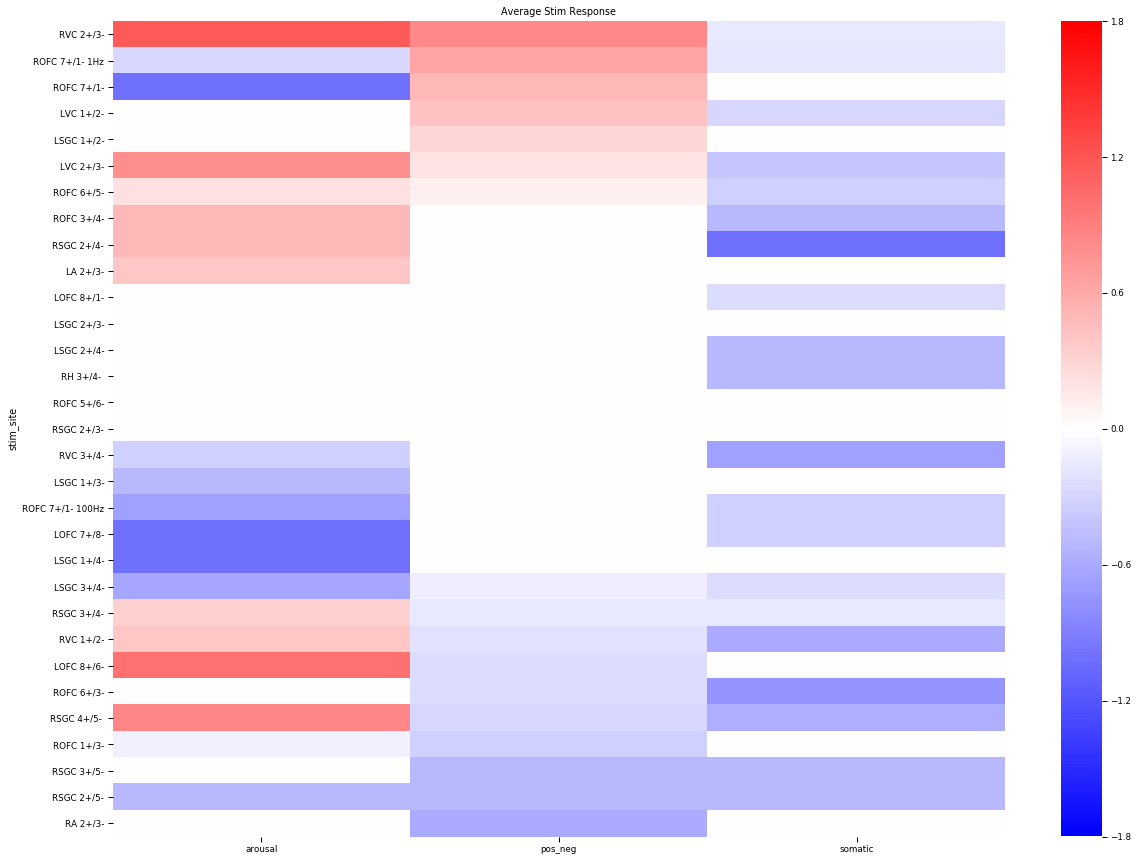

In [20]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
with plotting_context('paper'):
    plt.subplots(figsize=(20,15))
    plt.title("Average Stim Response")
    df = avg_site_df.sort_values(['pos_neg','arousal'],ascending=False)
    sns.heatmap(df[['arousal', 'pos_neg','somatic']],\
        cmap="bwr", vmin=-1.8,vmax=1.8)
    plt.savefig('clin_resp_heatmap_bwr.pdf', format='pdf', transparent=True, tight=True,)


### Correlation between Clinical Evaluation and Standard Scales

In [21]:
hamd_vas_df = pd.read_csv("HAMD_VAS_full.csv")
hamd_vas_df['stim_protocol'] = hamd_vas_df['stim_protocol'].fillna("")
hamd_vas_df["hamd2_score"] = hamd_vas_df["hamd2_score"].fillna(-1)
hamd_df = hamd_vas_df[~hamd_vas_df.hamd2_score.isna()].copy()

print(hamd_vas_df.shape)
print(hamd_df.shape)

(215, 22)
(215, 22)


In [22]:
def get_site(x):
    if x == "":
        return ""
    if len(x.split(" ")) < 2:
        return x
    site =  x.split(" ")[0]
    return re.sub("\_","", site)

def get_amps(x):
    search = re.search("[0-9][ ]*m[aA]", x)
    if search != None:
        i,j = search.span()
        amps = re.sub(" ", "", x[i:j])
        amps = re.sub("a", "A", amps)
        return amps
    return ""
def get_contacts(x):
    search = re.search("[0-9]\+\/[0-9]\-", x)
    if search != None:
        i,j = search.span()
        return x[i:j]
    return ""

hamd_df['site'] =  hamd_df.stim_protocol.apply(get_site)
hamd_df['contacts'] =  hamd_df.stim_protocol.apply(get_contacts)
hamd_df['amps'] =  hamd_df.stim_protocol.apply(get_amps)

In [23]:
hamd_df = hamd_df[~hamd_df.amps.isna()]
hamd_stim_df = hamd_df[hamd_df.amps != '0mA'].copy()
hamd_stim_df['hamd2_score'] = hamd_stim_df['hamd2_score'].astype(int)
hamd_stim_df.columns


Index(['Unnamed: 0', 'research_day', 'research_visit', 'time (form submit)',
       'vas_anxiety', 'vas_energy', 'vas_depression', 'vas_pain',
       'vas_concentration', 'hamdvas_q1', 'hamdvas_q2', 'hamdvas_q3',
       'hamdvas_q4', 'hamdvas_q5', 'hamdvas_q6', 'hamd2_score', 'notes',
       'stim_protocol', 'site', 'contacts', 'amps', 'trial'],
      dtype='object')

In [24]:
hamd_stim_df['trial'] = hamd_stim_df['trial'].fillna(-1)
hamd_stim_df = hamd_stim_df[hamd_stim_df.trial != -1]
print(hamd_stim_df.shape)

(58, 22)


In [25]:
hamd_stim_df.columns
subset = ['hamdvas_q1', 'hamdvas_q2', 'hamdvas_q3',
       'hamdvas_q4', 'hamdvas_q5', 'hamdvas_q6', 'hamd2_score',\
          'trial',"vas_anxiety","vas_energy","vas_depression"]
hamd_stim_df = hamd_stim_df[subset]

In [14]:
clin_ham_df = hamd_stim_df.merge(stim_resp_df,on='trial')

In [15]:
clin_ham_df['pos_neg'] = -1 * clin_ham_df['pos_neg']
## Flip sign to reflect direction of clinical scales. High positivity should reflect decreases 
##in depression "pos_neg" or mood valence measures high positive mood with +2 and low mood as -2. 
## NOTE: Run once

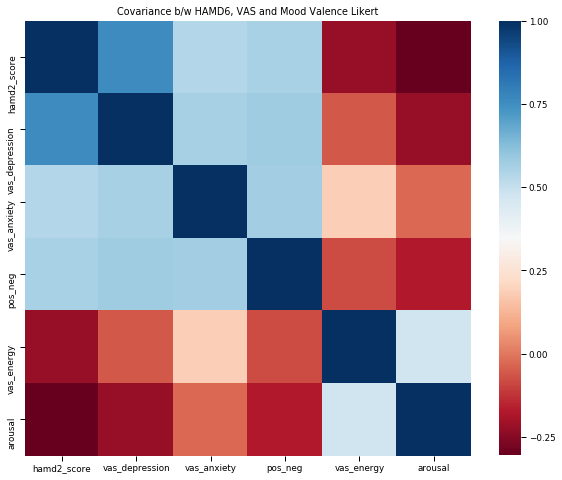

In [16]:
ham_qs = ["hamd2_score",\
          "vas_depression","vas_anxiety",'pos_neg',"vas_energy"]
likerts = ['arousal']


with plotting_context('paper'):
    plt.subplots(figsize=(10,8))
    plt.title("Covariance b/w HAMD6, VAS and Mood Valence Likert")
    corr = np.corrcoef(clin_ham_df[ham_qs].T, clin_ham_df[likerts].T)
    sns.heatmap(corr,\
        cmap="RdBu", xticklabels=ham_qs+likerts,yticklabels=ham_qs+likerts)
    plt.savefig('scale_correlations.pdf', format='pdf', transparent=True, tight=True,)